# Exploratory Data Analysis (EDA): 탐색적 자료 분석

## 1. Descriptive statistics
데이터의 형태, 변수 별 type 및 기술통계량을 뽑는 방법

In [1]:
import pandas as pd

### Read the data. (Example: pima-indians-diabetes)

In [2]:
variables = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv('pima-indians-diabetes.data', names = variables)
data.head(20)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


### Check dimensions of yout data,

In [3]:
data.shape

(768, 9)

### Check data type for each variable.

- category 데이터는 일일이 정확하게 확인할 것 . 그냥 int형으로 나오는 경우도 있음

In [4]:
data.dtypes

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

### Calculate decriptive statistics.

In [5]:
pd.set_option('display.width', 100)  # 결과물을 잘 보여주기 위한 옵션
pd.set_option('precision', 3)        # 결과물을 잘 보여주기 위한 옵션
description = data.describe()
print(description)

          preg     plas     pres     skin     test     mass     pedi      age    class
count  768.000  768.000  768.000  768.000  768.000  768.000  768.000  768.000  768.000
mean     3.845  120.895   69.105   20.536   79.799   31.993    0.472   33.241    0.349
std      3.370   31.973   19.356   15.952  115.244    7.884    0.331   11.760    0.477
min      0.000    0.000    0.000    0.000    0.000    0.000    0.078   21.000    0.000
25%      1.000   99.000   62.000    0.000    0.000   27.300    0.244   24.000    0.000
50%      3.000  117.000   72.000   23.000   30.500   32.000    0.372   29.000    0.000
75%      6.000  140.250   80.000   32.000  127.250   36.600    0.626   41.000    1.000
max     17.000  199.000  122.000   99.000  846.000   67.100    2.420   81.000    1.000


### Check class distribution.
- 현재 예제 데이터는 당뇨병 증세가 나타나는가를 **분류(Classification)**하는 문제와 관련이 있다.
- 이러한 경우, 각 클래스 별로 데이터 포인트가 몇 개씩 있는지를 파악하는 것이 중요하다.

In [6]:
class_counts = data.groupby('class').size()
print(class_counts)

class
0    500
1    268
dtype: int64


### Correlations between variables
- 본 예제에서는 Pearson's correlation coefficient를 계산 (-1 이상, 1 이하)
- 변수 간의 multicolinearity는 머신러닝 모델의 성능을 저하시키는 주요 요인 중 하나이므로, 반드시 이를 체크하는 것이 좋다.

In [7]:
correlations = data.corr(method = 'pearson')
print(correlations)

        preg   plas   pres   skin   test   mass   pedi    age  class
preg   1.000  0.129  0.141 -0.082 -0.074  0.018 -0.034  0.544  0.222
plas   0.129  1.000  0.153  0.057  0.331  0.221  0.137  0.264  0.467
pres   0.141  0.153  1.000  0.207  0.089  0.282  0.041  0.240  0.065
skin  -0.082  0.057  0.207  1.000  0.437  0.393  0.184 -0.114  0.075
test  -0.074  0.331  0.089  0.437  1.000  0.198  0.185 -0.042  0.131
mass   0.018  0.221  0.282  0.393  0.198  1.000  0.141  0.036  0.293
pedi  -0.034  0.137  0.041  0.184  0.185  0.141  1.000  0.034  0.174
age    0.544  0.264  0.240 -0.114 -0.042  0.036  0.034  1.000  0.238
class  0.222  0.467  0.065  0.075  0.131  0.293  0.174  0.238  1.000


### Skew of univariate distributions
- 각 변수 별 skewness(왜도, 비대칭도)를 계산
- 몇 모델은 변수가 Gaussian distribution임을 가정하고 있음. (예. Linear regression)
- 각 변수가 얼마나 치우쳐진 분포를 가졌는지 확인하는 것은 매우 중요
- Gaussian distribution처럼 평균을 중심으로 좌,우 대칭인 경우 skewness = 0
- 평균이 중앙값(median)보다 크면 (즉, 왼쪽으로 길게 늘어진 형태) skewness < 0
- 평균이 중앙값(median)보다 작으면 (즉, 오른쪽으로 길게 늘어진 형태) skewness > 0

In [8]:
skew = data.skew()
print(skew)

preg     0.902
plas     0.174
pres    -1.844
skin     0.109
test     2.272
mass    -0.429
pedi     1.920
age      1.130
class    0.635
dtype: float64


## 2. Visualization
각종 시각화 방법을 통해 직관적으로 데이터를 이해

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

### Histogram 

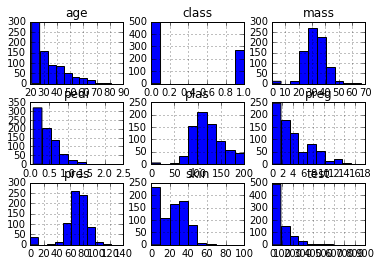

In [10]:
data.hist()
plt.show()

### Density plots

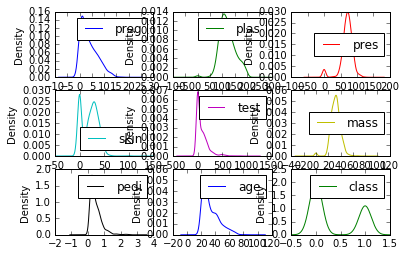

In [11]:
data.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False)
plt.show()

### Box-plot

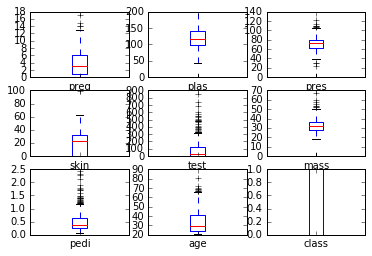

In [12]:
data.plot(kind = 'box', subplots = True, layout = (3,3), sharex =False, sharey =False)
plt.show()

### Correlation matrix plot 

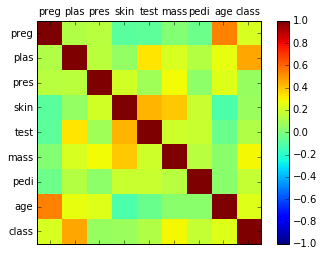

In [13]:
import numpy as np

# Calculate Pearson's correlation coefficients (revisited)
correlations = data.corr(method = 'pearson')

# Plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin = -1, vmax = 1)
fig.colorbar(cax)
ticks = np.arange(0,9, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
names = list(data.columns.values) # Data의 변수명을 받아 list로 저장
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

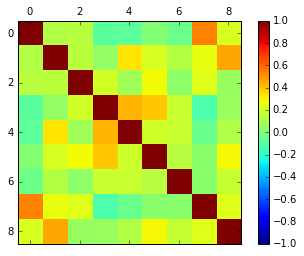

In [14]:
# 그림에서 변수명을 쓰고 싶지 않다면 이를 제외

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin = -1, vmax = 1)
fig.colorbar(cax)
plt.show()

### Scatter plot matrix

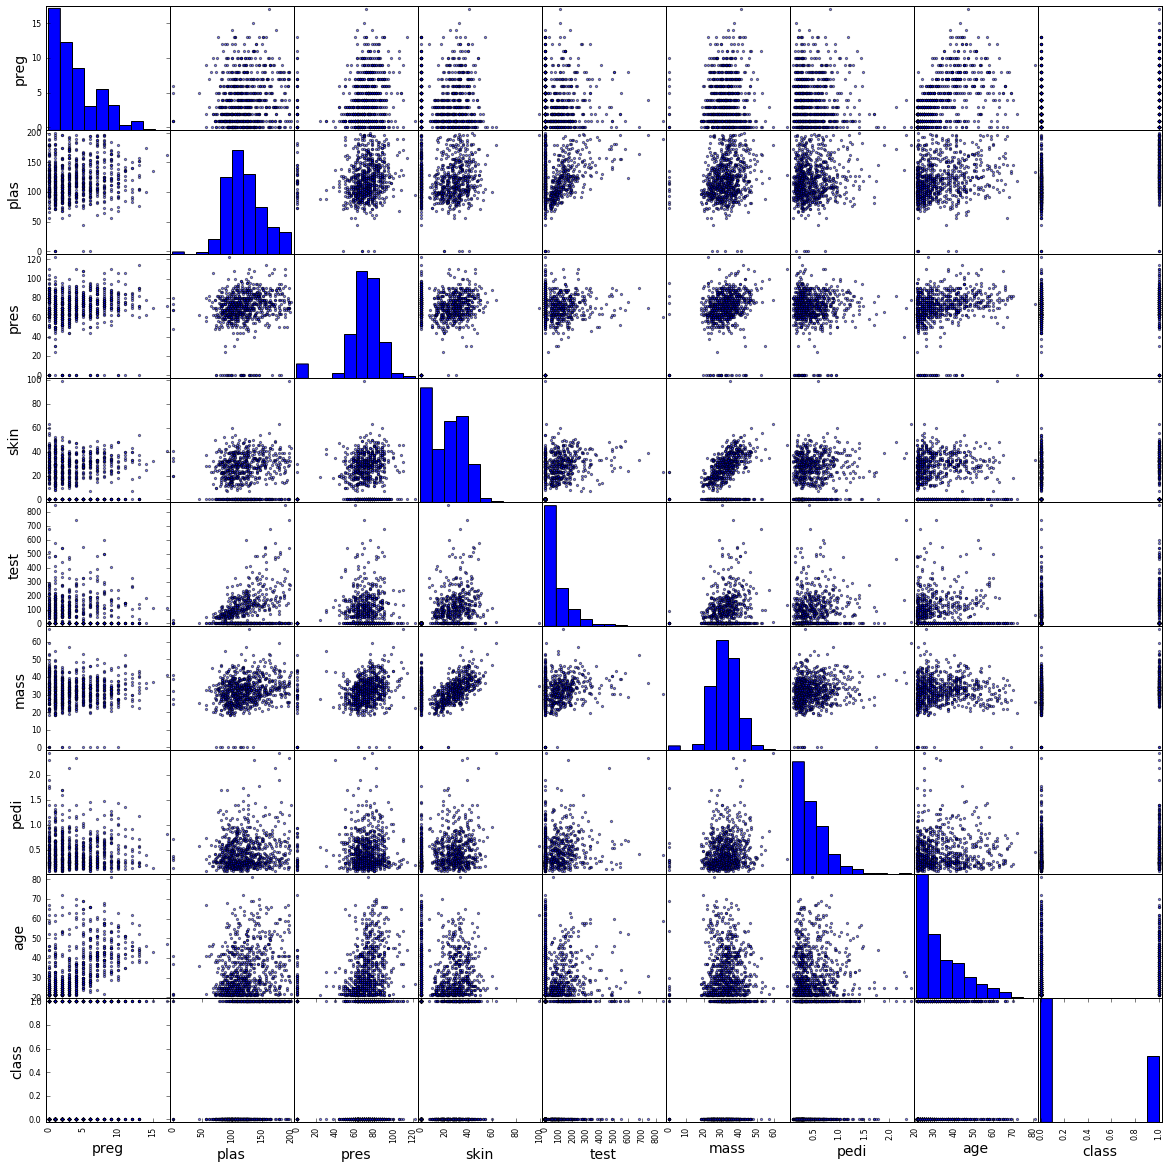

In [15]:
from pandas.tools.plotting import scatter_matrix
plt.rcParams['figure.figsize'] = (20, 20)
plt.rcParams['font.size'] = 14
scatter_matrix(data)
plt.show()